<a href="https://colab.research.google.com/github/DianaSmarandoiu/Reboot-Rebels/blob/main/Copy_of_CNMB_Machine_Learning_2022_Regression_Challenge_Product_Price_Prediction_Reboot_Rebels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Description

    
## Welcome
    
Welcome to the CNMB Machine Learning Competition 2022! Machine Learning has rapidly become one of the hottest topics in Computer Science in the last decade, with applications ranging from Siri to Driverless cars and Recommendation systems on all of your favourite social media apps. The goal of this competition is to help you learn how Machine Learning (ML) works in practice by implementing an ML model capable of making predictions that could solve a real-world problem!

<br>
    
## The Challenge

In this Challenge, you take the role of a Machine Learning Engineer at ABC Devices. Your company creates Storage Devices such as SSDs and HDDs to sell to various computer shops around the world. Usually, deciding the price of your products is a complicated process which can take weeks, numerous performance testing sessions, and numerous disussions with managers and specialists around the world. ABC Devices want you to build a Machine Learning model to recommend (or predict) what price they should sell their new products at.

To help you implement this model, the company has given you a dataset containing data from 2,000 Storage Devices they have created in the past, and the price at which they decided to sell them on release.

<br>

## What you need to do

This template notebook contains all the questions & tasks that you need to complete. In the real world, Machine Learning Engineers need to go through 4 steps to build a successful ML application. The four steps are shown below and this notebook will take you through each step individually, simulating the kind of work a real Machine Learning Engineer will perform when working on ABC Devices' Price Prediction Challenge.

The four steps of any ML Project (Total of 30 points will be awarded):

1. Exploratory Data Analysis (12 points)
2. Pre-Processing (5 points)
3. Training & Testing the Machine Learning models (5 points)
4. Analysing the Final Results (8 points)

You will find more information about why each step is necessary, and some guidance on how to complete it, in each section in this notebook.

<br>

## Rules & Plagiarism

Work in the programming industry has become globally collaborative, with most engineers using various online resources to help them tackle their coding problems. For this reason, we also allow the following websites to be used during this competition:

Allowed, no need to reference:

- Using any online resource to help with syntax-related problems (such as Stack Overflow, Python documentation, Scikit-learn documentation, etc..)
- Using the other notebooks from the Machine Learning course on PyML.
- Using any of the resources provided in this notebook.

Allowed, but must be referenced (a link to the website) whenever used:

- Using any online resource that doesn't contain code (e.g. articles or videos that describe what the best Machine Learning models are, why you should pre-process the data, etc)

Not allowed:

- Copying code from any large code base such as Github or Kaggle.
- Copying or sharing code with other teams.

**If you’re not sure if something is allowed or not, ask us!**

We are committed to ensuring this is a fair competition for everyone. Any attempt at using the non-allowed resources or not referencing external websites could result in disqualification.

<br>

## Before you get started

1. If you haven’t already, join the [Slack workspace](https://join.slack.com/t/cnmbmachinele-orw7148/shared_invite/zt-1fx73ua36-xiPo40qqzOM9mPUljsT7pA) for the competition. You can ask us any questions, even coding-related questions, on your team’s private channel. Make sure not to share/discuss your work outside your team's private channel!
2. Copy this Notebook (Go to File -> Save a copy in Drive) and rename it to `CNMB Machine Learning 2022 - Regression Challenge: Product Price Prediction - <Your Team Name>`. Then share the notebook with the rest of your teammates so you can start working on it together. Don't share your work with any other teams - it's a competition after all!
3. Don't change any code from the Setup section. Start from Step 1: Exploratory Data Analysis.
4. The tasks you need to complete are labelled with **TASK: what you need to do**. Write your answers or code just below those tasks to make sure there are no errors during marking.
5. If you have any questions, feel free to message us on Slack. Use the #general channel if your questions aren't confidential (e.g. you're not discussion your own code), or your team's private channel otherwise.

# Setup (Do not modify!)

### Import libraries

In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data Analysis libraries
import numpy as np
import pandas as pd

# Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn
plt.style.use('bmh')
seaborn.set_palette("deep")
seaborn.set(rc={'figure.figsize':(10, 5)})

# Machine Learning libraries
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# General libraries
import gdown

### Download the Dataset

In [ ]:
url = 'https://drive.google.com/uc?id=1ouPSgJNGVxFpRNm3FiAvK4b1AfyGCRv4'
filename = 'storage_devices_data.csv'
gdown.download(url, filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ouPSgJNGVxFpRNm3FiAvK4b1AfyGCRv4
To: /content/storage_devices_data.csv
100%|██████████| 119k/119k [00:00<00:00, 48.8MB/s]


'storage_devices_data.csv'

# Step 1: Exploratory Data Analysis

**What is Exploratory Data Analysis?**

Exploratory Data Analysis (EDA) is the process of understanding the data in depth and learning the characteristics of each column in your dataset. This is usually achieved through plots and visualisations. EDA allows you to get a better feel of your data and find useful patterns in it. It's a crucial first step in any Machine Learning project.

<br>

**Why is Exploratory Data Analysis necessary?**

It is crucial to understand your data in depth before you run Machine Learning algorithms for several reasons:
* You need to know the patterns in your data and see what type of values are stored in each column. If you know this, you can apply the best Pre-Processing methods to your data so that it's ready for being used by a Machine Learning algorithm.
* Depending on the types of variables/columns in your dataset, different Machine Learning algorithms might be more suitable (but you don't have to worry about that in this task).
* You also need to recognize errors in your data, or columns that should be removed. You will do this yourself later in Step 2: Pre-Processing.

## 1.1: Explore General Information about the Dataset

In this first part, we're going to use the Pandas library for python to inspect our dataset. Think of Pandas as the "Excel Spreadsheet of Python", but with a lot more power for data analysis. It's one of the biggest libraries used in almost every single Data analysis & Machine learning project.

We will tell you exactly what methods you need to use for this exercise, but you might find the following resources useful if you want to learn more about using Pandas on your own:
1. [20-minute video introduction on How to use Pandas](https://www.youtube.com/watch?v=tRKeLrwfUgU&ab_channel=NicholasRenotte)
2. [Collab Notebook with example code snippets from Pandas](https://colab.research.google.com/drive/13FioBuSwHit7r70zbEUXxu521jqonuT7?usp=sharing)
3. [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) (or when you have a problem, just google "How to [...] in pandas")

First, let's load the dataset into the "devices_df" variable below. A table is often called a "DataFrame" or "df" in pandas.

In [ ]:
devices_df = pd.read_csv(filename)

Let's begin by inspecting the first 5 rows in our dataset. We do this using the `head()` method.

In [ ]:
devices_df.head(5)

,driveName,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
0,Patriot Pyro 120GB SSD,SSD,111.8,2530,25.56,0.89,2011,11,74
1,Patriot Spark,SSD,238.5,2056,17.92,0.48,2016,9,123
2,WDC WD5000LPVT,HDD,465.8,674,48.13,0.03,2012,52,39
3,OCZ-VECTOR180,SSD,223.6,3837,4.32,3.97,2015,100,914
4,WDC WD4002FYYZ,HDD,3600.0,1386,5.54,0.07,2016,5,273


As we can see, our dataset contains 9 columns:

* driveName: the name of the product.
* type: drive type.
*	diskCapacity: Storage Capacity, in gigabytes (GB).
*	diskMark: Disk rating (higher is better).
*	valueRating: Estimated performance to price ratio (higher is better).
*	buildQuality: Rated quality of the mechanical components (higher is better).
*	releaseDate: the date the product was released.
*	samples: number of benchmark samples.
*	price: the variable we want to predict. The price the Storage Device was sold on release.

### Task 1.1.A: Understanding the Problem

**TASK:** From the problem description, ABC Devices wants to build a Machine Learning model to predict what price they should sell their new Storage Devices at. Why would this information be useful for them? Think of 1-3 ways in which ABC Devices could use this information.

1. It would help them not charge less money for what their product has to offer.
2. It can give an average price on which most customers agree to pay for.

### Task 1.1.B: Find the first device with a Disk Capacity lower than 100 GB
To get a bit more practice with Pandas, find the first storage device that appears in the dataset which has a capacity of less than 100 GB. There are multiple ways to achieve this. If you're stuck, see the recommended resources given above. 

**TASK:** Once you've found the device, copy the information from their row and paste it below:

In [ ]:
devices_df.loc[devices_df['diskCapacity']<100]

,driveName,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
8,Intel SSD 520 60GB SSDSC2CW060,SSD,55.9,2543,26.13,1.74,2012,11,95
20,Seagate ST980313AS,HDD,74.5,352,6.78,0.70,2009,16,34
25,Intel SSD 311 20GB mSATA,SSD,18.6,1297,9.98,6.99,2013,6,154
39,ADATA XPG SX900 64GB,SSD,59.6,1946,14.43,2.26,2013,4,122
53,Seagate ST340810A,HDD,37.3,161,1.24,3.48,2008,34,126
...,...,...,...,...,...,...,...,...,...
2051,Intel SSD X25-E 32GB,SSD,29.8,2038,41.59,1.64,2009,6,61
2066,OWC Mercury Electra 3G SSD,SSD,55.9,2021,4.61,7.84,2012,6,428
2068,Hitachi HTS548040M9AT00,HDD,34.5,189,4.61,1.19,2009,1,60
2069,KINGSTON SSDNow V+200 60GB,SSD,55.9,1859,21.88,1.52,2012,1,70


8	Intel SSD 520 60GB SSDSC2CW060	SSD	55.9	2543	26.13	1.74	2012	11	95

### Task 1.1.C: Inspect the min, max, and mean values of each column

Next, use the `describe()` method to see some statistics on each numerical column/variable in the dataset. We're particularly interested in the Min, Max, and Mean statistics. In other words, for each column, we want to see what is the lowest, highest, and average value we can expect.

In [ ]:
devices_df.describe()

,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,509.559727,3976.621934,38.889836,0.687258,2013.636845,94.790284,133.052910
std,637.029567,6186.685070,57.104218,3.148252,3.581501,358.409604,151.445979
min,0.572600,94.000000,0.720000,0.010000,2008.000000,1.000000,0.000000
25%,119.200000,626.500000,7.965000,0.140000,2011.000000,9.000000,51.000000
50%,238.500000,1959.000000,17.400000,0.310000,2013.000000,21.000000,90.000000
75%,476.900000,3898.000000,43.085000,0.700000,2016.000000,56.000000,157.000000
max,5500.000000,48300.000000,630.890000,136.220000,2021.000000,6505.000000,1957.000000


**TASK:** Based on the information above, complete the list below with the Min, Max, and Mean values of each column. If a column doesn't contain numerical data, write "not applicable".


* driveName: not applicable
* type: not applicable
*	diskCapacity: 0.572600 5500.000000	509.559727
*	diskMark: 94.000000	48300.000000 3976.621934	
*	valueRating: 0.720000	630.890000	38.889836
*	buildQuality: 0.010000	136.220000	0.687258	
*	releaseDate: 2008.000000 2021.000000 2013.636845
*	samples: 1.000000 6505.000000 94.790284
*	price: 0.000000 1957.000000 133.052910

### Task 1.1.D: Inspect the Type of each column

Next, we also want to write down what type of data each of the columns contains: Categorical or Numerical. Categorical columns are those where there are only a small, fixed number of values possible. Note that this is a tricky question, as even columns that contain numbers can be categorical if the numbers can only take a fixed & small number of values. By contrast, Numerical columns are those where there are many (theoretically infinite) values possible.

<br>

**TASK:** Complete the list below. If you're not sure if a column is categorical or numerical, write down why you're unsure.
* driveName: numerical
* type: categorical
*	diskCapacity: numerical
*	diskMark: numerical
*	valueRating: numerical
*	buildQuality: numerical
*	releaseDate: categorical
*	samples: numerical
*	price: numerical

## 1.2. Univariate Data Analysis (Visualising the distribution of each variable)

Now that we have a basic idea of what our dataset contains, we want to visualise each column/variable individually. We want to see, for example, how many products of each type are there in our dataset? Or how low-price, medium-price, and high-price devices have we created?

To do this, we will use the `Seaborn` library for python - one of the most popular plotting & visualisation tools. In this exercise, you will only need to use two methods from the Seaborn library: `countplot()` and `histplot()`, and example code is provided for you below.


<br>

For each of the 12 variables in the dataset, your task will be to plot its distribution using either `countplot()` or `histplot()` and to write 1-3 sentences to describe any interesting observations you can see. Some questions you could answer (but not limited to) are:
* How many values are there of each category?
* Are there categories equally distributed, or does a category appear more frequently in the dataset than others?
* Are there any categories or numbers that appear much more frequently?
* Do minimum, maximum, or average values appear more frequently than the rest?
* If the plot is a histograms, does the data follow a normal/gaussian distribution? If so, what is the average value, and is the curve wide or tall?

<br>

**Recommended Materials**


When plotting histograms, we recommend you watch the first 3 videos to learn what a Normal Distribution (or Bell Curve) is, and how to interpret a basic histogram:
1. [The Normal Distribution explained in one minute](https://youtu.be/DJzmb7hGmeM)
2. [The Normal Distribution - Average values and wide/tall curves](https://youtu.be/rzFX5NWojp0)
3. [How to read a Histogram](https://youtu.be/DLbQcb4ckV0)
4. [Countplot documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html) and [Histplot documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) (if you need help with syntax, or just google "how to [...] in seaborn")

### Task 1.2.A: Plotting the Price
Since we know from our analysis above that "Price" is a numerical variable (it can take many different numerical values), we use a `histplot()` method to plot the distribution of the price. For categorical variables, or variables with few possible values, you might want to use `countplot()`.

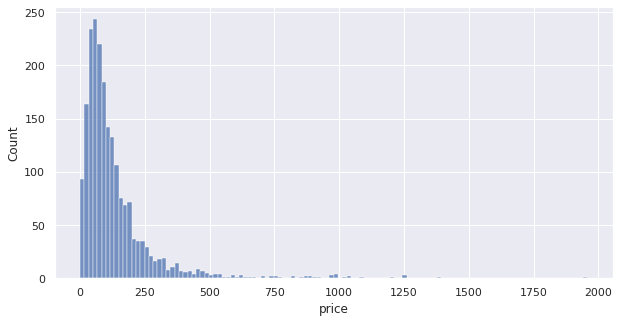

In [ ]:
seaborn.histplot(data=devices_df, x='price')

**TASK:** Write down your observations from the plot here. (Try answering some of the questions written above)

* Most products cost between 0 and 250.

* There is a single product that costs around 1900.
The histogram has a very tall and narrow curve.


### Task 1.2.B: Plotting the Type


In [ ]:
# Hint: you should use the code given above, and only make two small modifications to the code.

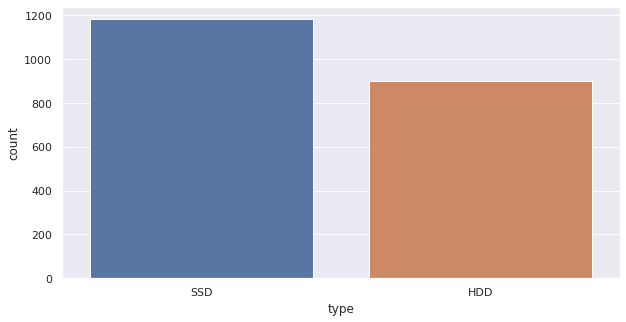

In [ ]:
seaborn.countplot(data=devices_df, x='type')

**TASK:** Write down your observations from the plot here.

* There were built more SSDs models than HDDs
* SSD tops close to 1200 models and HDD sits at about 900 models

### Task 1.2.C: Plotting the Disk Capacity

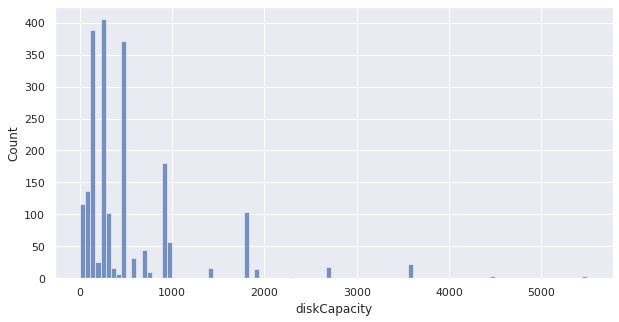

In [ ]:
seaborn.histplot(data=devices_df, x='diskCapacity')

**TASK:** Write down your observations from the plot here.

* Most drivers have a capacity between 0 and 1000 GB.

* There are around 100 drivers with a capacity a little lower than 2000 GB.

* The biggest driver has a capacity over 5000 GB.
The histogram does not have a curve and the values are sparse.


### Task 1.2.D: Plotting the Disk Mark

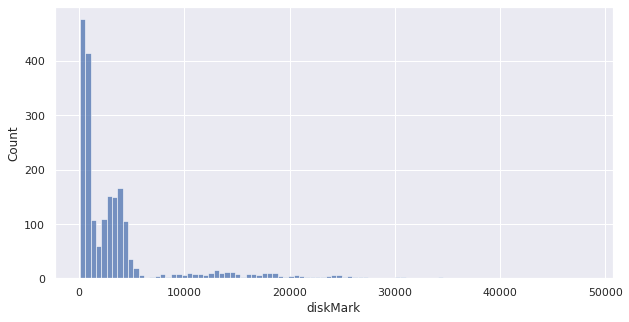

In [ ]:
seaborn.histplot(data=devices_df, x='diskMark')

**TASK:** Write down your observations from the plot here.

* Most drivers have a diskMark lower than 10000.

* Between 0 and 10000 the distribution of diskMarks fluqtuates quite havely, and keeps leveled after 10000.

### Task 1.2.E: Plotting the Value Rating

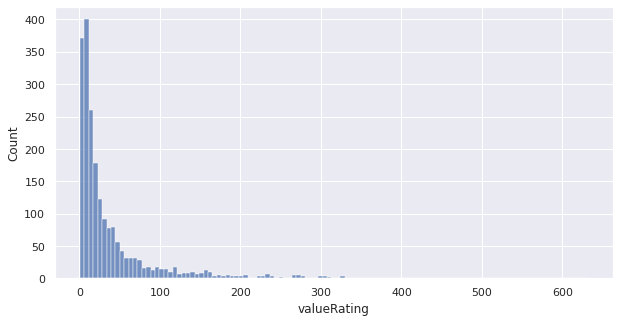

In [ ]:
seaborn.histplot(data=devices_df, x='valueRating')

**TASK:** Write down your observations from the plot here.

* Interestingly, the plot follows an exponential distribution. (https://en.wikipedia.org/wiki/Exponential_distribution which we will keep using if it is the case)
* Most of them have a low value rating, so for it's price, the product doesn't rise up to the expectations.
The histogram presents only half a curve.

### Task 1.2.F: Plotting the Build Quality

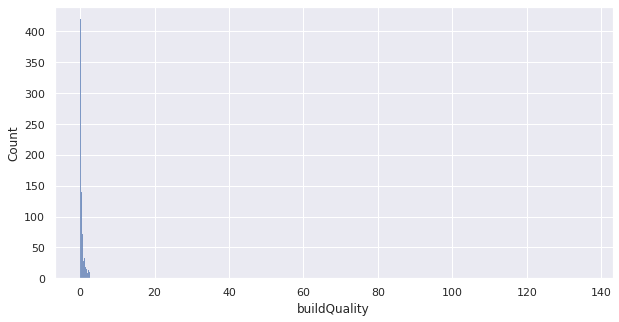

In [ ]:
seaborn.histplot(data=devices_df, x='buildQuality')

**TASK:** Write down your observations from the plot here.

* The build quality is quite low for all the products.
* Taking a closer look at the plot, we observe that it might take the form of an Exponential distribution.
* Because of one anomaly in the datasheet, there is a single product with the buildQuality 136, making it unnecesarly long and harder to read.
This histogram is really tall and slim, with only half a curve.

### Task 1.2.G: Plotting the Release Date

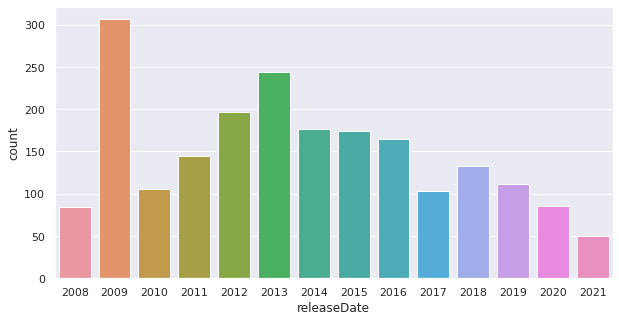

In [ ]:
seaborn.countplot(data=devices_df, x='releaseDate')

**TASK:** Write down your observations from the plot here.

* Most drivers were sold in 2009, while in 2021 the number of products sold was the smallest.
* This plot forms a wide and short Normal distribution curve, the average realeaseDate being around 2014 and 2015.

### Task 1.2.H: Plotting the Samples

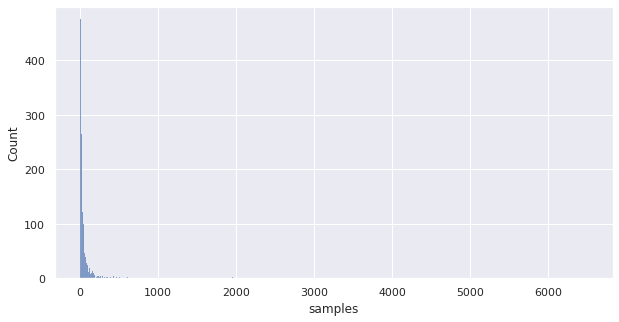

In [ ]:
seaborn.histplot(data=devices_df, x='samples')

**TASK:** Write down your observations from the plot here.

* Most models of drivers have close to 0 samples produced and do not go over 1000.
* The plot follows the exponential distribution.
The histplot is only half a curve, tall and very small, due to the large values.

### Task 1.2.I: Plotting the Drive Name

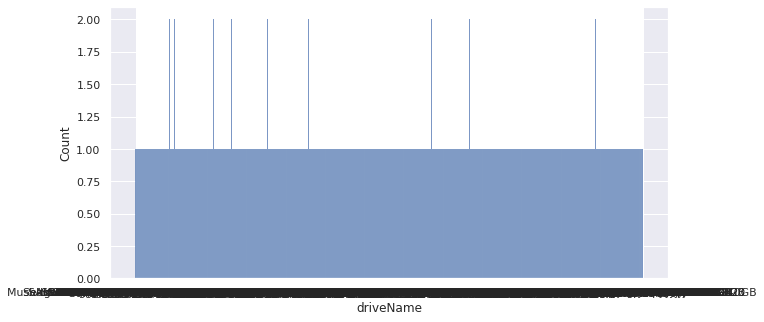

In [ ]:
seaborn.histplot(data=devices_df, x='driveName')

**TASK:** In trying to plot the drive name, you might find that the results are looking very odd, or that your code is taking a long time to run. This is normal. Please explain why you think this is happening.

* It's happening because there are a lot different names the drivers could have, and it takes a while to go through all of them.
* Since the names are unique, and we set that the driveName is numerical (it has infinite values) the plot must be of hist type and it's essecially trying to count every single one of the 2075 names the table contains. What is interesting is that normally there should be one of each type but there are occasions when pairs occur. (2 pairs may occur if they have the same name but are of different type, or are put in production once again at a latter year)

## Task 1.3. Bivariate Data Analysis (Visualising the relationship between each column and 'Price')

Next, we want to understand if there are any patterns between a variable (e.g. Build Quality) and our target variable (Price). To do this, we will use the `scatterplot` method, which should create a visualisation with Price on the X-axis and the other variable on the Y-axis. Each point on the scatterplot will represent a device which has the price equal to X and the other variable equal to Y.

<br>

After each plot, write 1-3 sentences to describe any interesting observations you can see from the plot. Some questions you could answer (but not limited to) are:
* Is there any correlation between the variables? For example, as the Disk Capacity of a device increases, does the Price also increase?
* Is there a threshold after which the price is much higher or lower?
* What value has the highest price?
* If the plot is a histogram, are the distributions identical? Or is one wider/taller than the other? Is the average price the same for both?
* If there is correlation between the price and the other variable, you should write that the variables are uncorrelated.

**Recommended Materials**
* [Scatterplot Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

### Task 1.3.A: Plotting the relationship between Price and Type

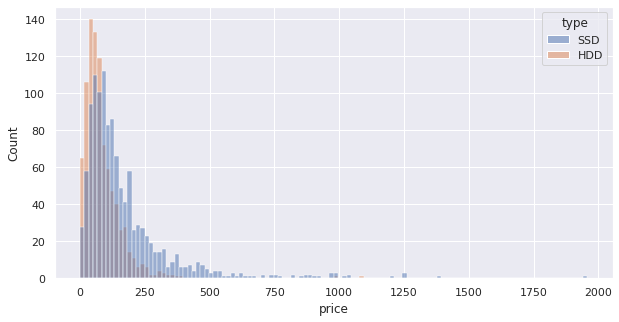

In [ ]:
seaborn.histplot(data=devices_df, x='price', hue='type')

**TASK:** Write down your observations from the plot here.

* SSDs have more models than HDD the higher the price gets, but there are more cheaper HDDs than SSDs. Should also mention that both type follow similar distributions.
* The more exepnsive the disks gets, the lesser models there are.
* The values peak between the 0 and 250 price marks, with the highest being HDD, having around 140 models sold at aprox. 50.
The histograms are similar, nearly identical.

### Task 1.3.B: Plotting the relationship between Price and Disk Capacity

In [ ]:
# Note: for the rest of the tasks in this section, you should only use the scatterplot method.
# See the documentation above if you're not sure how to use the method.

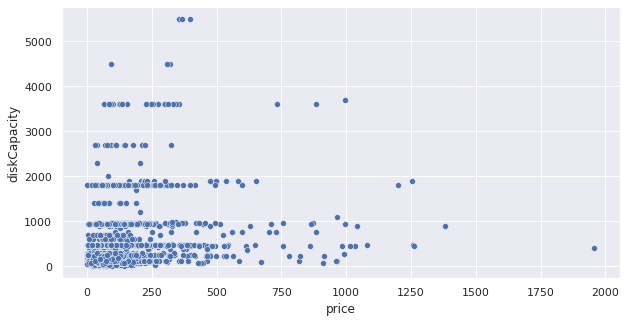

In [ ]:
seaborn.scatterplot(data=devices_df, x='price', y='diskCapacity')

**TASK:** Write down your observations from the plot here.

* Capacity is not neccesarly a factor that changes the price since there are 3 drivers with over 5000 GB capacity that cost around 350-400, and a driver of a bit over 500 GB that costs almost 2000.
* Most disks don't go over the price of 500 regardless of their diskCapacity.

### Task 1.3.C: Plotting the relationship between Price and Disk Mark

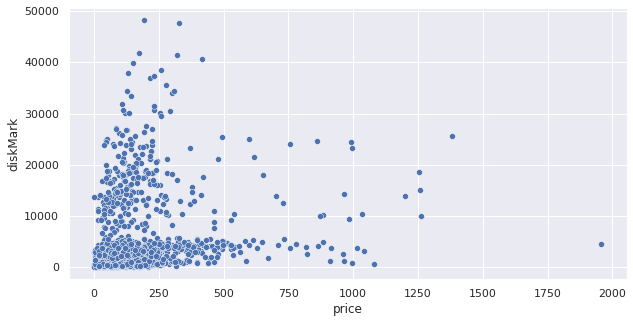

In [ ]:
seaborn.scatterplot(data=devices_df,x='price',y='diskMark')

**TASK:** Write down your observations from the plot here.

* There are a few products that have a low rating and a big price, but there are more drivers with a high rating and are cheap.
* Most products are contained whitin diskMark 10000 and price 500 area.

### Task 1.3.D: Plotting the relationship between Price and Value Rating

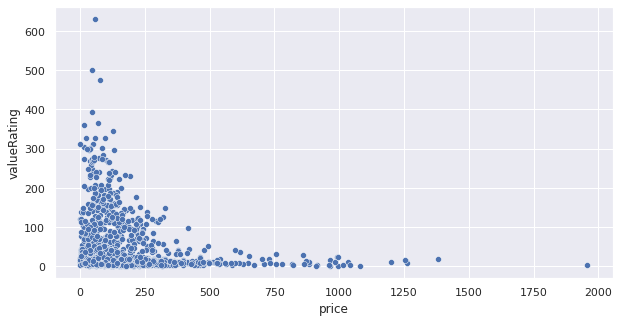

In [ ]:
seaborn.scatterplot(data=devices_df,x='price',y='valueRating')

**TASK:** Write down your observations from the plot here.
* Most products sit whiting the ValueRating 100, Price 250 square
* An exponential distribution is to be observed in the plot.
* Ironically, the most expensive model has a low value rating.

### Task 1.3.E: Plotting the rleationship between Price and Build Quality

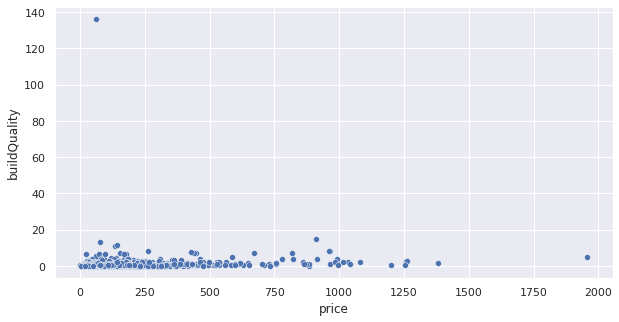

In [ ]:
seaborn.scatterplot(data=devices_df,x='price',y='buildQuality')

**TASK:** Write down your observations from the plot here.

* The build quality doesn't usually surpasses the 20 mark, but there is an exception that is over 130
* The buildQuality also stays leveled, forming a line.

### Task 1.3.F: Plotting the relationship between Price and Release Date

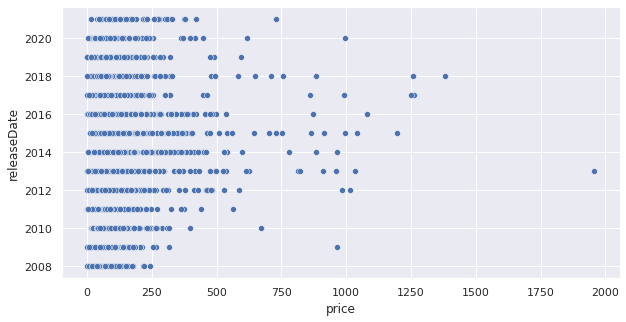

In [ ]:
seaborn.scatterplot(data=devices_df,x='price',y='releaseDate')

**TASK:** Write down your observations from the plot here.

* The most expensive driver was the one released in 2013.
* The prices remained quite constant between the years 2008 and 2011, and 2015 and 2021 with values lower than 250 but between 2012 and 2016 it fluqtuated towards 500
* It follows Normal distribution, with the average year when prices rose being 2013.

### Task 1.3.G: Plotting the relationship between Price and Samples

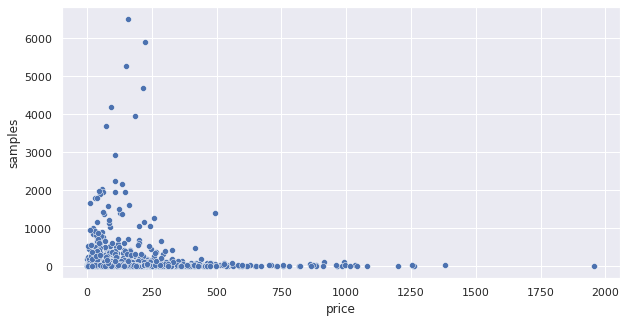

In [ ]:
seaborn.scatterplot(data=devices_df,x='price',y='samples')

**TASK:** Write down your observations from the plot here.

* As the drivers get expensive, the number of samples decreases.
* Most samples are made on the cheap side, under 250 on the price line.

## Task 1.3.K: Plotting the relationship between 2 columns of your choice

In this task, pick any 2 variables that you want from the dataset (excluding the "price" variable you analysed until now) and plot the relationship between them. Similarly, write down any interesting observations below.

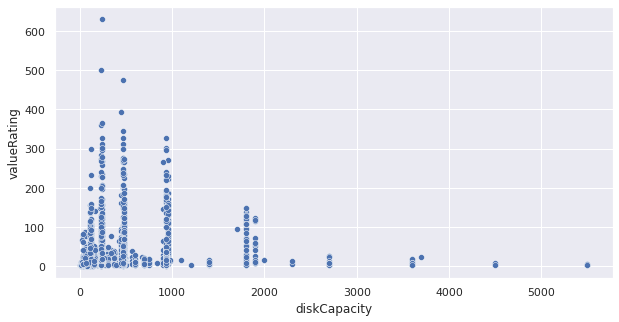

In [ ]:
seaborn.scatterplot(data=devices_df,x='diskCapacity',y='valueRating')

**TASK:** Write down your observations from the plot here.

* Drivers with small capacities have a better price for their capacity.
* It seems that high capacities disks have close to 0 valueRating.
* diskCapacity line has mostly set in stone disk capacity marks, but not always.

# Step 2: Pre-Processing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn. Therefore, it is extremely important that we preprocess our data before feeding it into our ML models.


## Task 2.1: Removing redundant variables from the data
As you have noticed earlier in Section 1.2, one of the columns in our dataset contains information that is not important or useful in predicting the Price of a customer. Keeping redundant columns in our dataset is bad for our Machine Learning model, because it reduces the quality of our data and might cause the model to look for patterns where the aren't any. Therefore, it's best practice to remove this column from our dataset. 

**Note: From now on, we will use the `processed_df` variable to store our processed dataframe. The `devices_df` will contain our original, unprocessed data.**

<br>

**TASK:** Complete the code below to remove this column.

In [ ]:
processed_df = devices_df.drop("driveName", axis=1) # Modify only this line

# Inspect the processed_df to make sure that the column has been removed
processed_df

,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
0,SSD,111.8,2530,25.56,0.89,2011,11,74
1,SSD,238.5,2056,17.92,0.48,2016,9,123
2,HDD,465.8,674,48.13,0.03,2012,52,39
3,SSD,223.6,3837,4.32,3.97,2015,100,914
4,HDD,3600.0,1386,5.54,0.07,2016,5,273
...,...,...,...,...,...,...,...,...
2074,HDD,298.1,340,4.10,0.28,2009,127,109
2075,SSD,59.6,1068,8.90,2.01,2010,9,141
2076,HDD,149.0,422,12.06,0.23,2009,298,49
2077,SSD,111.8,2666,46.99,0.51,2018,240,72


## Task 2.2: Encoding the Text variables

As you have already seen, some of the columns in our dataframe contain text variables instead of numbers. A key thing to remember is that Computers (which include Machine Learning models) don't understand words - they only understand numbers. Therefore, we need to encode each text value in our dataset into a number, using a Label Encoder. For example, if we had a column called "Colour", we would encode all occurances of "Red" into 0, "Blue" to 1, "Green" to 2, etc.

<br>

**TASK:** Modify the line below to specify what columns you need to encode.

In [ ]:
categorical_cols = ["type","releaseDate"] # Modify only this line

def Label_Encoding(df, col):
    label_encoder = LabelEncoder()
    df[col]= label_encoder.fit_transform(df[col])

for col in categorical_cols:
    Label_Encoding(processed_df, col)

# Inspect the processed_df to make sure that the columns have been encoded correctly
processed_df

,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
0,1,111.8,2530,25.56,0.89,3,11,74
1,1,238.5,2056,17.92,0.48,8,9,123
2,0,465.8,674,48.13,0.03,4,52,39
3,1,223.6,3837,4.32,3.97,7,100,914
4,0,3600.0,1386,5.54,0.07,8,5,273
...,...,...,...,...,...,...,...,...
2074,0,298.1,340,4.10,0.28,1,127,109
2075,1,59.6,1068,8.90,2.01,2,9,141
2076,0,149.0,422,12.06,0.23,1,298,49
2077,1,111.8,2666,46.99,0.51,10,240,72


**TASK:** What was the effect of the encoding? What text values got encoded to what numbers?

The categorical columns (type and releaseDate) got encoded into numbers.
* SSD turned ito 1, HDD into 0
* 2011 turned into 3,2016 into 8

## Task 2.3: Scaling

Feature scaling in Machine Learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

In many machine learning algorithms, we need to scale our features so that one significant number doesn’t impact the model just because of their large magnitude. For example, in our dataset, features such as the "diskCapacity" or "diskMark" contain values over 1,000, while features such as the "buildQuality" contain numbers usually smaller than 1. As we said before, computers (and machine learning models) only understand numbers - not the context of what those numbers mean. Therefore, the "diskCapacity" feature will impact the model disproportionately more than it should, simply because it's much larger.

To address this issue, we need to "project" all numerical values to a similar range. We will do this thorugh `Standard Scaling`, which standardises a column/feature by subtracting the mean from the column and dividing by its standard deviation. You can learn more about how Standardisation works in this video: [What is Standardisation?](https://youtu.be/D0Ue0fBm--8).


<br>

If you want to find out more about why Scaling is necessary in Machine Learning, you can read this article: 

[Scale data for better performance of Machine Learning Models](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

<br>

**TASK:** Complete the code below to specify what columns you need to scale.

In [ ]:
numerical_cols  = ["diskCapacity", "diskMark", "valueRating","buildQuality","samples", "releaseDate"] # Modify only this line

# Scale data
scaler = StandardScaler()
processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])

# Inspect the data to make sure that the columns were scaled correctly
processed_df

,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples,price
0,1,-0.624548,-0.233885,-0.233486,0.064414,-0.736417,-0.233840,74
1,1,-0.425608,-0.310519,-0.367309,-0.065849,0.659981,-0.239421,123
2,0,-0.068710,-0.533956,0.161851,-0.208820,-0.457137,-0.119418,39
3,1,-0.449004,-0.022574,-0.605527,1.042970,0.380702,0.014539,914
4,0,4.852497,-0.418842,-0.584158,-0.196111,0.659981,-0.250584,273
...,...,...,...,...,...,...,...,...
2074,0,-0.332026,-0.587956,-0.609381,-0.129391,-1.294977,0.089890,109
2075,1,-0.706510,-0.470255,-0.525304,0.420252,-1.015697,-0.239421,141
2076,0,-0.566138,-0.574698,-0.469953,-0.145277,-1.294977,0.567113,49
2077,1,-0.624548,-0.211897,0.141883,-0.056317,1.218541,0.405248,72


**TASK:** What was the effect of the Scaling? Give two examples of 'diskCapacity' values that were in in the original dataset and the values that they have been pre-processed into after scaling.

The numerical columns turned into way lesser numbers than originally were.
* In diskCapacity we got these examples: 111.8 into -0.624548 and 238.5 into -0.425608

## Task 2.4: Splitting the dataset into Training and Testing sets

The last thing we need to do in the Pre-Processing Step is to split our dataset into two separate tests: one which will be used to Train the machine learning models, and one which will be used to Test (or evaluate) their performance.

<br>

**Why do we need two different sets? Why can't we evaluate their performance on the same data we use for training?**

Machine Learning models are prone to something called "Overfitting". That means they can be exceptionally good at predicting on data they've seen before, but they perform much worse on data they haven't seen before. In the real world, our Machine Learning model will almost never see the same data twice. So it's very important that we keep a Testing Set with data it hasn't seen during training, so that we can more realistically evaluate its performance after the model is trained.

If you want to read more about why using different Training and Testing sets is neccesary, check out [Understanding the Train Test split](https://builtin.com/data-science/train-test-split)

### First, split the dataset into X and y sets

Before splitting the dataset into separate Training and Testing sets, we need to split our data into X (the features) and y (the target variable). The features (X) are the information that our Machine Learning model will look at in order to predict the target variable (y). By now, you should be aware of what the y is.

<br>

**TASK:** Complete the line below.

In [ ]:
target_variable = "price" # Modify only this line

# Separate the dataset into X (our features) and y (our target variable)
X, y = processed_df.drop(columns=target_variable, axis=1), processed_df[target_variable]

**TASK:** Run the code cell below. What do the X and y variables contain? Does the first value of X correspond to the first value of y, etc?

* The X variable contains our processed data without the price column and the y variable contains only the price column. The price values that were in X remain unchanged while they got moved to y, meaning that they still correspond.

In [ ]:
display(X)
print(y)

,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
0,1,-0.624548,-0.233885,-0.233486,0.064414,-0.736417,-0.233840
1,1,-0.425608,-0.310519,-0.367309,-0.065849,0.659981,-0.239421
2,0,-0.068710,-0.533956,0.161851,-0.208820,-0.457137,-0.119418
3,1,-0.449004,-0.022574,-0.605527,1.042970,0.380702,0.014539
4,0,4.852497,-0.418842,-0.584158,-0.196111,0.659981,-0.250584
...,...,...,...,...,...,...,...
2074,0,-0.332026,-0.587956,-0.609381,-0.129391,-1.294977,0.089890
2075,1,-0.706510,-0.470255,-0.525304,0.420252,-1.015697,-0.239421
2076,0,-0.566138,-0.574698,-0.469953,-0.145277,-1.294977,0.567113
2077,1,-0.624548,-0.211897,0.141883,-0.056317,1.218541,0.405248


0        74
1       123
2        39
3       914
4       273
       ... 
2074    109
2075    141
2076     49
2077     72
2078     76
Name: price, Length: 2079, dtype: int64


### Split the data into Training and Testing sets

Run the cpde cell below. The X_train and y_train are the X (features) and y (target variable) of the data in the Training set, while the X_test and y_test are the X (features) and y (target variable) of the data in the Testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Do not modify this cell, just run it

# Step 3: Training and Testing the Machine Learning Models

Congratulations for making it this far! Now that we have explored our dataset and pre-processed its values, we're ready to do the most exciting part of this challenge - using a real Machine Learning model to generate predictions from our data!

Remember our challenge: we have our X features (information about ABC Devices' products, including their disk capacity, build quality, release date...) and we want to be able to predict our y target variable (the price we should sell this product for).

<br>

To achieve this, we're going to use the `scikit-learn` library: one of the most popular Machine Learning libraries for python. Scikit-learn contains methods written for all the machine learning models & methods you will need. Code on how to train and test your first model is already given to you below. **Your task will be to choose another 2-4 Regression Models from [Scikit-learn](https://scikit-learn.org/stable/supervised_learning.html) and make modifications to the code given to you below so that you can use it on your other chosen models.**

<br>

**Recommended Resources:**
* [Eroarea Medie (RMSE) - Curs Regresie PyML](https://colab.research.google.com/drive/12w_ra8ALoZG6GnYtFWEYorQDG9szF9fE#scrollTo=95tw-mTl5uXf)

Note: In this challenge, we use the Mean Absolute Error (MSE) as a measurement of performance, not the Root Mean Square Error (RMSE). The MSE is the amount of error in your measurements. It is the difference between the predicted price and the true/correct price. For example, if your model predicts a price of 75, but the real price was 60, the absolute error is 75-60 = 15.

In [ ]:
results_df = pd.DataFrame(columns=["model", "mean absolute error"]).set_index('model') # Do not modify this cell, just run it

## Task 3.1: Train & Test different ML Models

In [ ]:
# We have written the function below to help you visualise some of your model's predictions
# DO NOT MODIFY
def inspect_sample_predictions(model, X_test, y_test, num_samples):
  X_sample = X_test[:num_samples]
  y_sample = y_test[:num_samples].values
  y_pred = model.predict(X_sample)

  for i in range(len(X_sample)):
    display(X_sample.iloc[i].to_frame().T)
    print("Your model's Predicted Price: ${:.0f} | Real Price: ${:.0f}\n".format(y_pred[i], y_sample[i]))

### Linear Regression

**DO NOT MODIFY THE CODE BELOW!** Run it to see the results, and then read the explanations below. 

**When you have chosen your other 2-4 Regression models, copy this code and modify it below.**

In [ ]:
# Import the library for Linear Regression (you will need to import a different library for each model - find the appropriate one in the Scikit-learn documentation)
from sklearn.linear_model import LinearRegression

# Initialise a Logistic Regression model
model_name = "Linear Regression"
reg = LinearRegression()

# Train the model on the training set
reg.fit(X_train, y_train)

# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = reg.predict(X_test)

# Compare the predictions against the true target labels, and calculate the Mean Absolute Error (MAE) of your model's predictions
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae

# Inspect a few predictions
inspect_sample_predictions(reg, X_test, y_test, num_samples=6)

Mean Absolute Error of Linear Regression: 74.8206211411514


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $66 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $52 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $145 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $219 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $53 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $98 | Real Price: $161



**What did this code do?**
* First, you initialised a `LinearRegression()` model. This is one of the most popular Regression models.
* Then, you called the `.fit(X_train, y_train)` method to train your Logistic Regression model on the training set. During training, the model sees both X_train (the features) and y_train (the target variable) and tries to model the relationship between then.
* Next, you asked the model to predict the target variables (prices) of the devices in your testing set using the `.predict(X_test)` method. The model generated a prediction for each of the devices, based on what it learned during training.
* Then, you called the `mean_absolute_error(y_test, y_pred)` method to compare the real prices of the devices in your X_test set against the predicted prices generated by your model. From this, you calculated the Mean Absolute Error of all your predictions (e.g. if your error is 50, then on average your model's predictions are off by $50).
* Finally, the `inspect_sample_predictions()` method we have given you allows you to explore some of your models predictions against their real prices.

**TASK:** Add code for your other Regression Models below (one different cell for each model)

## **Model 1**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialise a Logistic Regression model
model_name = "Random Forest"
forest = RandomForestRegressor()

# Train the model on the training set
forest.fit(X_train, y_train)


# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = forest.predict(X_test)

# Compare the predictions against the true target labels, and calculate the Accuracy of your model's predictions
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae

# Inspect some of your model's predictions
inspect_sample_predictions(forest, X_test, y_test, num_samples=6)

Mean Absolute Error of Random Forest: 24.850817307692303


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $109 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $36 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $97 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $409 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $51 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $207 | Real Price: $161



## **Model 2**

In [ ]:
from sklearn.linear_model import SGDRegressor


model_name = "Stochastic"
st = SGDRegressor()

# Train the model on the training set

st.fit(X_train, y_train)

# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = st.predict(X_test)

# Compare the predictions against the true target labels, and calculate the Accuracy of your model's predictions
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae



# Inspect some of your model's predictions
inspect_sample_predictions(st, X_test, y_test, num_samples=6)

Mean Absolute Error of Stochastic: 73.98160431219272


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $63 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $50 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $140 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $216 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $50 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $94 | Real Price: $161



## **Model 3**

In [ ]:
from sklearn.linear_model import LogisticRegression


# Initialise a Logistic Regression model
model_name = "Logistic Regression"
reg = LogisticRegression(solver="liblinear", max_iter=10000)

# Train the model on the training set
reg.fit(X_train, y_train)

# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = reg.predict(X_test)

# Compare the predictions against the true target labels, and calculate the Mean Absolute Error (MAE) of your model's predictions
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae

# Inspect a few predictions
inspect_sample_predictions(reg, X_test, y_test, num_samples=6)

Mean Absolute Error of Logistic Regression: 72.1610576923077


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $72 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $67 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $64 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $88 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $72 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $61 | Real Price: $161



* Despite its name, it is actually a model for classification but we wanted to try it anyway.

## **Model 3**

In [ ]:
from sklearn.neural_network import MLPRegressor

model_name = "Neural Network"
nn = MLPRegressor(solver="sgd", max_iter=10000)

# Train the model on the training set
nn.fit(X_train, y_train)

# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = nn.predict(X_test)

# Compare the predictions against the true target labels, and calculate the Mean Absolute Error (MAE) of your model's predictions
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae

# Inspect a few predictions
inspect_sample_predictions(nn, X_test, y_test, num_samples=6)

Mean Absolute Error of Neural Network: 37.751783777892044


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $109 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $35 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $64 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $386 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $39 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $246 | Real Price: $161



### Test Accuracies Table

Run the cell below to see a summary of the Test Accuracy scores obtained by each model

In [ ]:
results_df

,mean absolute error
model,
Linear Regression,74.820621
Random Forest,24.850817
Stochastic,73.981604
Logistic Regression,73.546001
Neural Network,37.751784


## Task 3.2: Investigating what happens when you Test a model on the Training set


As you might've seen in the articles/videos recommended above, Testing your model on the same set used during Training is a bad idea.

**TASK:** Copy the code you used for one of your models above and evaluate it on the Train set instead of the Test set.

In [ ]:
from sklearn.linear_model import LogisticRegression


# Initialise a Logistic Regression model
model_name = "Logistic Regression"
reg = LogisticRegression(solver="liblinear", max_iter=10000)

# Train the model on the training set
reg.fit(X_train, y_train)

# Use the model to predict unseen data from the Test set, based on what it learned during training
y_pred = reg.predict(X_train)

# Compare the predictions against the true target labels, and calculate the Mean Absolute Error (MAE) of your model's predictions
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error of {}: {}".format(model_name, mae))
results_df.loc[model_name] = mae

# Inspect a few predictions
inspect_sample_predictions(reg, X_test, y_test, num_samples=6)

Mean Absolute Error of Logistic Regression: 73.54600120264583


,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
1362,0.0,-0.434401,-0.581165,-0.613585,-0.081734,-1.294977,-0.141744


Your model's Predicted Price: $72 | Real Price: $126



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
2004,0.0,-0.06871,-0.525872,-0.416879,-0.18658,-0.736417,-0.169652


Your model's Predicted Price: $67 | Real Price: $43



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
607,0.0,2.026202,-0.451501,-0.499205,-0.199288,0.101422,-0.125


Your model's Predicted Price: $64 | Real Price: $118



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
29,1.0,-0.06871,-0.018047,-0.51024,0.051705,0.380702,-0.083138


Your model's Predicted Price: $88 | Real Price: $374



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
429,0.0,-0.610259,-0.570495,-0.527406,-0.084911,-1.294977,-0.261748


Your model's Predicted Price: $72 | Real Price: $39



,type,diskCapacity,diskMark,valueRating,buildQuality,releaseDate,samples
861,0.0,0.662515,-0.540585,-0.626897,-0.148454,0.380702,-0.155698


Your model's Predicted Price: $61 | Real Price: $161



**TASK:** Why is Testing the model on the training set considered a bad idea? What was the outcome of testing on the training set in your case? (if it's different than you expected, explain what you expected to see and what actually happened)



> We expected it to either crash, not run at all or to give ridiculous results since we thought that the data would be overwritten somehow.

> Surprisingly, it performed well, with a barely noticable difference in the Mean Absolute Error.

> It's not okay to test the model on the training set because we are already teaching the model on the training set, so testing it on things it already knows makes no sense and it wouldn't help us at all to understand if the model is working properly or not.


# Step 4: Analysing the Final Results

## Task 4.1: Analyse the Error Scores

**TASK:** Looking at the Mean Absolute Error scores of each model, are there any observations you can make? Did the results match your expectations, or did you expect better results from the models? Is there any model that performs much better or much worse than the others? Can you find out why that might be the case?

We didn't know what to expect, so let's say a Mean Absolute Error of 80 sounded awful, but it's not.
The Random Forest model performed the best, which is to be expected hence it uses averaging to improve the predictive accuracy, so it would stay closer to the to the actual values.

## Task 4.2: Which model you would choose?

**TASK:** Based on the analyses you have made above, which model would you choose for ABC Devices to predict at which price they should sell their new products?

Before issuing a recommendation, are there any ethical considerations to be made? How will ABC Devices or other people be affected when the Machine Learning model makes an incorrect prediction?




*  The company should choose the best model because if they do not know what prices to give to their products, they might make mistakes and overprice them and the customers wouldn't buy from them anymore. And if they price them under the current market prices, while they would bring cutomers, they wouldn't make any profit.

*   As explained in the previous task, we would choose the RandomForest model because it gives the best results with little deviation.



## Task 4.3: Improving your model

**TASK:** Write 3 short ideas for how you could improve your model to generate better predictions. 
* You might want to search a few articles to find out what can generally be done to improve a machine learning model. Make sure to reference any articles by providing the link! Or some of your ideas could even be to ask ABC Devices for different resources (e.g. would a better computer help the model be more accurate?)

As a first request, more data comes to mind since it results in better predictions. A computer specifically used for machine learning (with good CPU and GPU) does come in handy when you have to process complex mathematical equations or a big amount of data, reducing the processing time.
As far as the pre-processing goes, we touched all the main points during this challenge.



## Task 4.4: Classification vs Regression

**TASK:** 
1. How would you decide whether to use a Classification model or a Regression model for a given problem?
2. Let's say ABC Devices only allowed you to use a Classification model in this project. But they still want the model to give recommendations for an approximate price that new devices should be sold for. How would you do this with a classification model? (if you think it's not possible, argument why)

1. It depends on the problem. For example, if we are given pictures and the problem requires us to write a program that identifies whether in those pictures are flowers or not, we would choose classification since it's a small number of values (categories, like 'yes/no'), but if we are given data and we should predict a number, we would choose regression, for we have to map it and the values are real numbers.

2. We believe it's possible, but the model cannot give approximate prices, since classification has only a small number of categories as values, so we can transform the model to give out whether the product is cheap or expensive. But this would be too vague and unhelpful, so while we believe it's possible, it's not practical.

## Task 4.5: What have you learned?

**TASK:** Write a few bullet points of things you have learned from this Challenge.



*   Just like in the Classification Challenge, we learned how to treat data for a program (pre-process, scale, train) and that it is a whole process, when we were used to coding directly a code, barely touching the data we were provided with.
*   We learned the differences of Classification and Regression and how to use them.
* We learned a bunch of new algorithms that sounded terrifing at first, for example Neural Network, Random Forest, etc.

